<a href="https://colab.research.google.com/github/milad-B/Logistic_regression-KNN-SVM/blob/main/Logistic_regression_%26_KNN_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 09 :
    <br><br>Logistic Regression & KNN & SVM</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 12th Mordad, 23:00 </font></h1>



## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 09: Question sheet: Logistic Regression & KNN & SVM</a>
</font>
</div>


# 🚢🛳 Titanic Prediction 🛳🚢

# PART 00

# Step1: Import Libraries

In [246]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from joblib import dump , load

# Step2: Read Datasets

In [247]:
df = pd.read_csv('/content/Titanic.csv')



# Step3: Check out the Data

In [248]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
df.shape

(891, 12)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [252]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

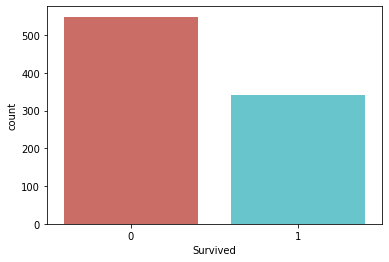

In [253]:
df['Survived'].value_counts()
sns.countplot(x='Survived', data=df, palette='hls')

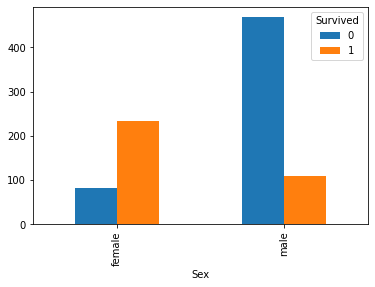

In [254]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')

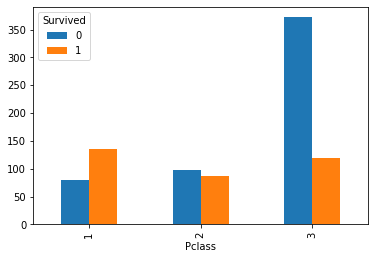

In [255]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')

## Step4: Data preparation 
<hr>
<h2>Dealing with Missing Data

###Dealing with age missing data 

In [256]:
df['Initial']=0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

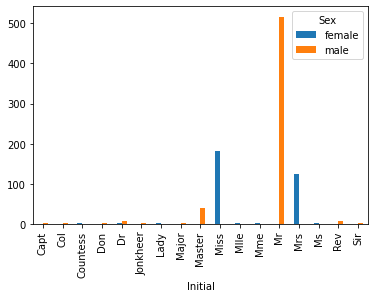

In [257]:
pd.crosstab(df.Initial, df.Sex).plot(kind = 'bar')

In [258]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

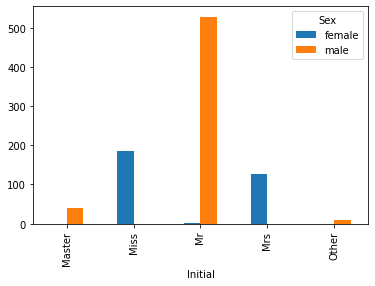

In [259]:
pd.crosstab(df.Initial, df.Sex).plot(kind = 'bar')

In [260]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [261]:
df.loc[ (df.Age.isnull()) & (df.Initial=='Master'), 'Age'] = 4
df.loc[ (df.Age.isnull()) & (df.Initial=='Miss'), 'Age'] = 22
df.loc[ (df.Age.isnull()) & (df.Initial=='Mr'), 'Age'] = 33
df.loc[ (df.Age.isnull()) & (df.Initial=='Mrs'), 'Age'] =35
df.loc[ (df.Age.isnull()) & (df.Initial=='Other'), 'Age'] = 47

In [262]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

###Dealing with embarked missing data 

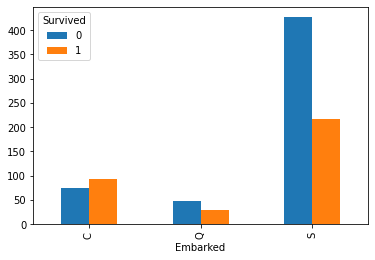

In [263]:
pd.crosstab(df.Embarked, df.Survived).plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

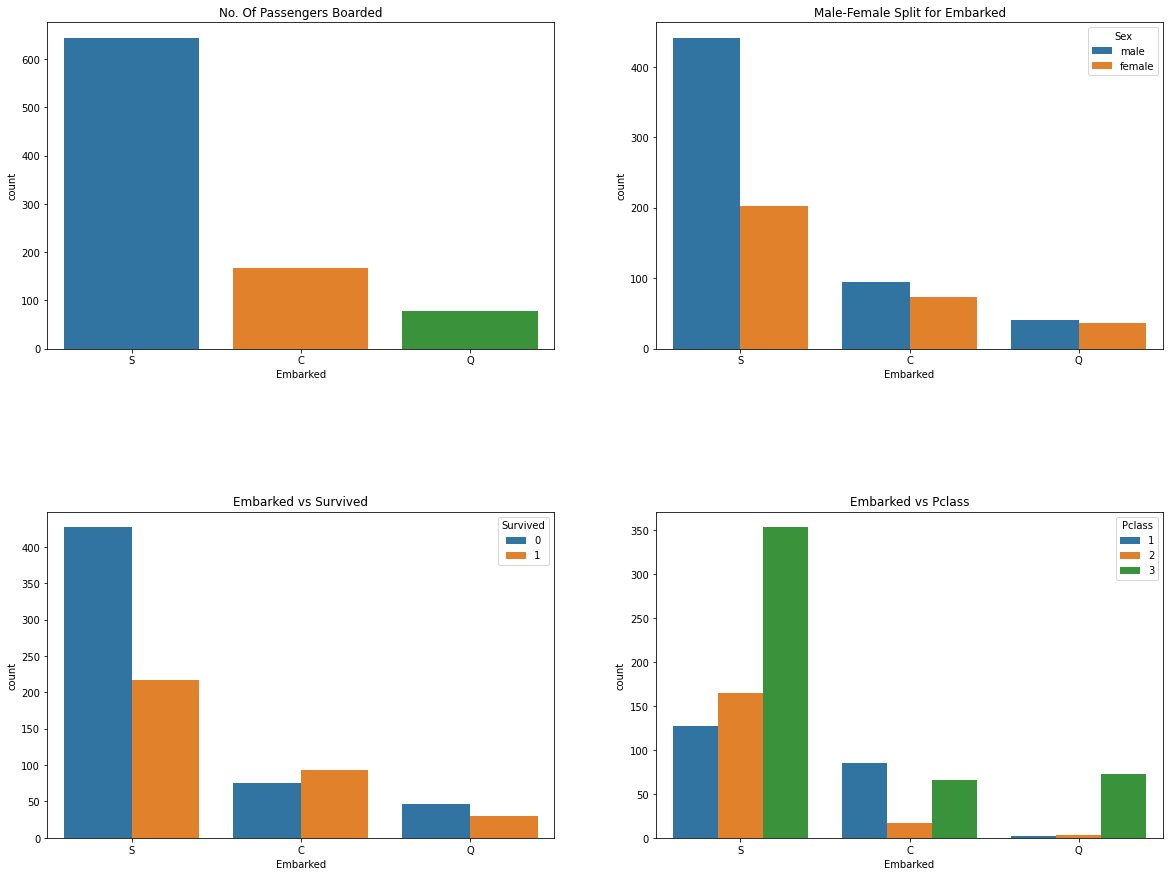

In [264]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data = df, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data = df, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived' , data = df, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data = df, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [265]:
df['Embarked'].fillna('S', inplace=True)

In [266]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

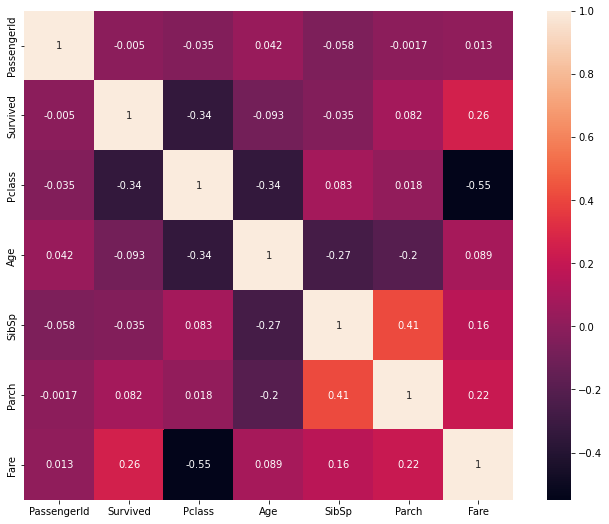

In [267]:
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(df.corr(), annot=True, square=True)

#### Hint: Now, we don't have any Missing Data.

## 🟣Creating Dummy Variables

###Encode data

In [268]:
#age
df['Age_band']=0
df.loc[ df['Age']<=16 , 'Age_band']=0
df.loc[ (df['Age']>16) & (df['Age']<=32) , 'Age_band']=1
df.loc[ (df['Age']>32) & (df['Age']<=48) , 'Age_band']=2
df.loc[ (df['Age']>48) & (df['Age']<=64) , 'Age_band']=3
df.loc[ df['Age']>64, 'Age_band']=4


In [269]:
#SibSp & Parch

df['Family_Size']=0
df['Family_Size']=df['Parch'] + df['SibSp']                   #family size
df['Alone']=0
df.loc[df.Family_Size==0, 'Alone']=1                          #Alone


In [270]:
#Fare
df['Fare_Range']=pd.qcut(df['Fare'],4)

df['Fare_cat']=0
df.loc[df['Fare']<=7.91, 'Fare_cat']=0
df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454), 'Fare_cat']=1
df.loc[(df['Fare']>14.454) & (df['Fare']<=31), 'Fare_cat']=2
df.loc[(df['Fare']>31) & (df['Fare']<=513), 'Fare_cat']=3

In [271]:
#sex
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [272]:
#Embarked
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [273]:
#Initial
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [274]:
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [275]:
df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   SibSp        891 non-null    int64
 4   Parch        891 non-null    int64
 5   Embarked     891 non-null    int64
 6   Initial      891 non-null    int64
 7   Age_band     891 non-null    int64
 8   Family_Size  891 non-null    int64
 9   Alone        891 non-null    int64
 10  Fare_cat     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


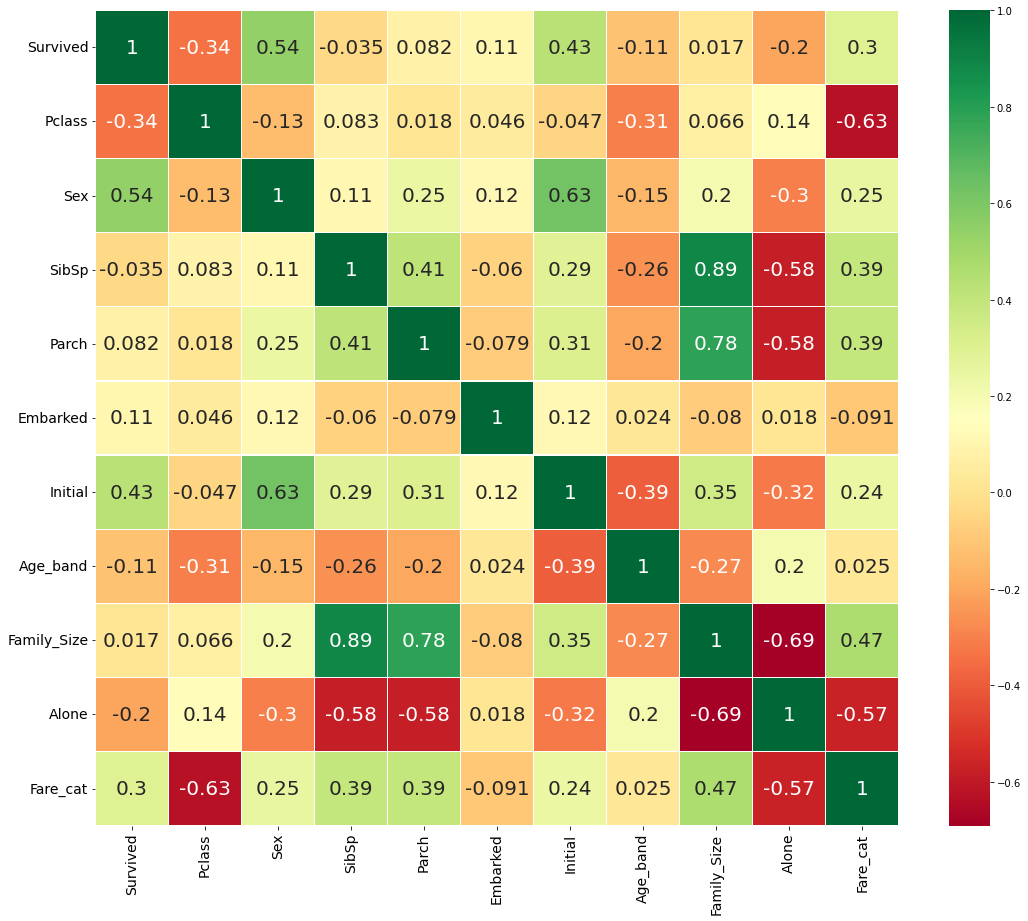

In [277]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Step5: Train Test Split

In [278]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [293]:
train_X , test_X , train_y , test_y = train_test_split (X, y, test_size=0.3, random_state=101)

# Step6: Scaling Data

In [282]:
from sklearn.preprocessing import StandardScaler

In [280]:
df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,0.361392,0.735129,1.439955,0.904602,0.602694,1.505051
std,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.001959,0.842373,1.613459,0.489615,1.118148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,4.000000,10.000000,1.000000,3.000000


In [285]:
scaler = StandardScaler()
scaler.fit(train_X)

StandardScaler()

In [294]:
X_train = scaler.transform(train_X)   #scaled X train

X_test = scaler.transform(test_X)     #scaled X test

# PART 01

In [291]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN

In [292]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step7: Build the model ---> Logistic Regression

In [295]:
model_LR = LogisticRegression()
model_LR.fit(X_train, train_y)


LogisticRegression()

# Step8: Predict

In [296]:
pred_y = model_LR.predict(X_test)


# Step9: Evaluate model

## 🟣 Confusion Matrix

In [297]:
cm = confusion_matrix(test_y, pred_y)
cm

array([[131,  23],
       [ 35,  79]])

### Classification Report

In [298]:
target_names = ['Gone', 'Survived']
cr = classification_report(test_y, pred_y, target_names = target_names)
print(cr)

              precision    recall  f1-score   support

        Gone       0.79      0.85      0.82       154
    Survived       0.77      0.69      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



### Plot Confusion Matrix

In [301]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


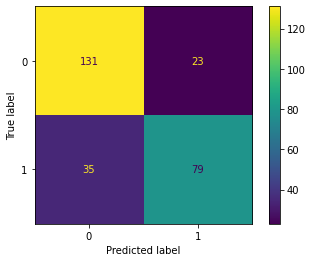

In [302]:
plot_confusion_matrix(model_LR, X_test, test_y)  
plt.show()

## 🟣 Accuracy Score

In [303]:
acc = accuracy_score(pred_y , test_y)
acc

0.7835820895522388

## 🟣 Precision Score

In [304]:
from sklearn.metrics import precision_score, recall_score , f1_score


In [305]:
p_score= precision_score(test_y, pred_y)
p_score


0.7745098039215687

## 🟣 Recall score

In [306]:
r_score= recall_score(test_y, pred_y)
r_score


0.6929824561403509

## 🟣 F1-score

In [307]:
f_score = f1_score(test_y, pred_y)
f_score

0.7314814814814816

## 🟣 Curves & AUC

In [309]:
from sklearn.metrics import plot_precision_recall_curve , plot_roc_curve , auc

### Plot Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


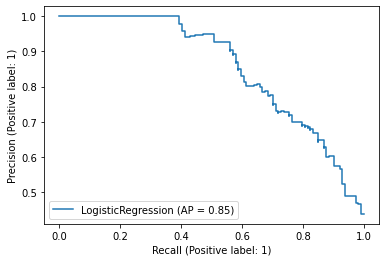

In [310]:
plot_precision_recall_curve(model_LR, X_test, test_y)

### Plot Roc Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


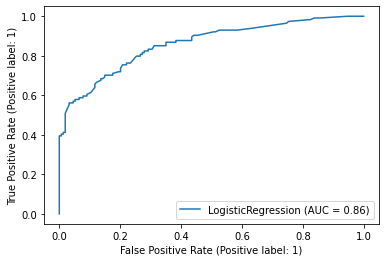

In [311]:
plot_roc_curve(model_LR, X_test, test_y)

# Step10: Create DataFrame From Accuracy & Precision & Recall & F1-score

In [385]:
eval_LR = pd.DataFrame([acc*100, p_score*100, r_score*100, f_score*100],['Accuracy' , 'Precision' , 'Recall' , 'F1-score'],['precent'])
eval_LR

,precent
Accuracy,78.358209
Precision,77.450980
Recall,69.298246
F1-score,73.148148


# PART 02

# Step11: Build the model ---> KNN

In [314]:
model_KNN = KNeighborsClassifier() 
model_KNN.fit(X_train, train_y)


KNeighborsClassifier()

# Step12: Predict

In [315]:
pred_y_KNN = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Step13: Evaluate model

## 🟣 Confusion Matrix

In [316]:
cm = confusion_matrix(test_y, pred_y_KNN)
cm

array([[109,  45],
       [ 22,  92]])

### Classification Report

In [317]:
target_names = ['Gone', 'Survived']
cr = classification_report(test_y, pred_y_KNN, target_names = target_names )
print(cr)

              precision    recall  f1-score   support

        Gone       0.83      0.71      0.76       154
    Survived       0.67      0.81      0.73       114

    accuracy                           0.75       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.76      0.75      0.75       268



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


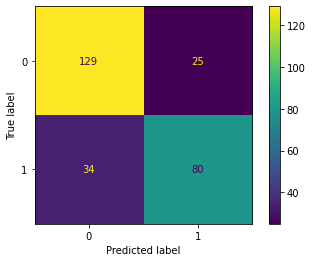

In [318]:
plot_confusion_matrix(model_KNN , X_test , test_y )
plt.show()

## 🟣 Accuracy Score

In [319]:
acc_KNN = accuracy_score(test_y, pred_y_KNN)
acc_KNN

0.75

## 🟣 Precision Score

In [320]:
p_score_KNN = precision_score(test_y, pred_y_KNN)
p_score_KNN

0.6715328467153284

## 🟣 Recall score

In [321]:
r_score_KNN = recall_score(test_y, pred_y_KNN)
r_score_KNN

0.8070175438596491

## 🟣 F1-score

In [322]:
f_score_KNN = f1_score(test_y, pred_y_KNN)
f_score_KNN

0.7330677290836652

In [323]:
pd.DataFrame([acc_KNN*100, p_score_KNN*100, r_score_KNN*100, f_score_KNN*100],['Accuracy' , 'Precision' , 'Recall' , 'F1-score'],['precent'])

,precent
Accuracy,75.000000
Precision,67.153285
Recall,80.701754
F1-score,73.306773


# Step14: Elbow Method for Choosing Reasonable K Values

In [324]:
a_index = list(range(1,50))
a= pd.Series()

for i in a_index:
    model_KNN = KNeighborsClassifier(n_neighbors=i) 
    model_KNN.fit(X_train, train_y)
    prediction = model_KNN.predict(X_test)
    a = a.append(pd.Series(1-metrics.accuracy_score(prediction,test_y)))

print('Error for different values of n are:',a.values,'\nwith the min value as ',a.values.min(),a.values.min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Error for different values of n are: [0.22014925 0.2238806  0.22014925 0.21641791 0.22014925 0.20149254
 0.19402985 0.18283582 0.17537313 0.18656716 0.17537313 0.17537313
 0.17537313 0.17910448 0.17910448 0.18283582 0.19402985 0.19402985
 0.19402985 0.19029851 0.19402985 0.19776119 0.19776119 0.19776119
 0.19402985 0.19776119 0.19776119 0.19029851 0.19402985 0.19402985
 0.19776119 0.19776119 0.19776119 0.19776119 0.20149254 0.19029851
 0.19776119 0.19402985 0.19776119 0.19776119 0.19776119 0.20149254
 0.20149254 0.20149254 0.20149254 0.20149254 0.20149254 0.20149254
 0.20522388] 
with the min value as  0.17537313432835822 0.17537313432835822


### Plot

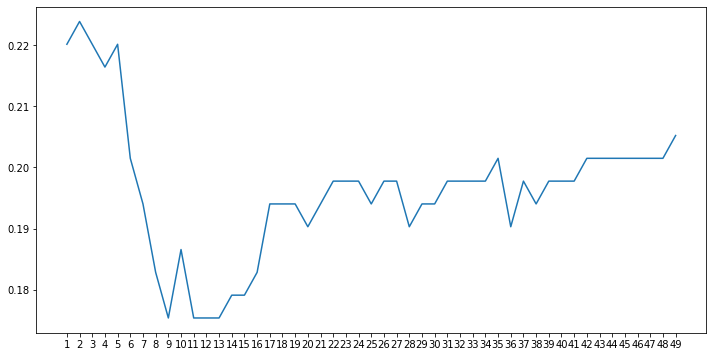

In [325]:
x= list(range(1,50))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Step15: Creating a Pipeline to find best K value

In [326]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [327]:
scaler = StandardScaler()
KNN = KNeighborsClassifier()

In [328]:
operation = [('scaler', scaler), ('knn', KNN)]

pipe = Pipeline(operation)

In [329]:
k_values = list(range(1,20))
param_grids = {'knn__n_neighbors' : k_values}

In [330]:
full_cv_classifier = GridSearchCV(pipe, param_grids, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [331]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=14),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False}

# Step16: Final Model

## 🟣 Fit model with the best K value

In [332]:
model_KNN = KNeighborsClassifier(n_neighbors=14)
model_KNN.fit(X_train, train_y)

KNeighborsClassifier(n_neighbors=14)

## 🟣 Predict

In [333]:
pred_y_KNN = model_KNN.predict(X_test)

## 🟣 Evaluating the Model

### Confusion Matrix

In [334]:
cm = confusion_matrix(test_y, pred_y_KNN)
cm

array([[142,  12],
       [ 36,  78]])

#### Classification Report

In [335]:
target_names = ['Gone', 'Survived']
cr = classification_report(test_y, pred_y_KNN, target_names = target_names )
print(cr)

              precision    recall  f1-score   support

        Gone       0.80      0.92      0.86       154
    Survived       0.87      0.68      0.76       114

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



#### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


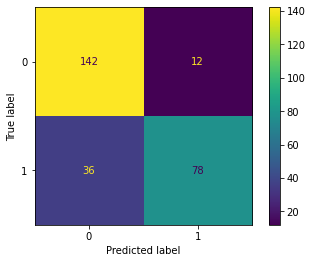

In [336]:
plot_confusion_matrix(model_KNN , X_test , test_y )
plt.show()

### Acuracy

In [337]:
acc_KNN = accuracy_score(test_y, pred_y_KNN)
acc_KNN

0.8208955223880597

### Precision Score

In [338]:
p_score_KNN = precision_score(test_y, pred_y_KNN)
p_score_KNN

0.8666666666666667

### Recall score

In [339]:
r_score_KNN = recall_score(test_y, pred_y_KNN)
r_score_KNN

0.6842105263157895

### F1-score

In [340]:
f_score_KNN = f1_score(test_y, pred_y_KNN)
f_score_KNN

0.7647058823529413

### Predict with a sample

In [341]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


In [342]:
sample = [[1,	1,	1,	0,	1,	1,	2,	1,	0,	3]]
model_KNN.predict(sample)

array([1])

# Step17: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [344]:
eval_KNN = pd.DataFrame([acc_KNN*100, p_score_KNN*100, r_score_KNN*100, f_score_KNN*100],['Accuracy' , 'Precision' , 'Recall' , 'F1-score'],['precent'])
eval_KNN

,precent
Accuracy,82.089552
Precision,86.666667
Recall,68.421053
F1-score,76.470588


# PART 03

# Step18: Build the model ---> SVM

In [345]:
model_SVC = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_SVC.fit(X_train , train_y)

SVC(C=0.1, gamma=0.1, kernel='linear')

# Step19: Predict

In [346]:
pred_y_SVC = model_SVC.predict(X_test)

# Step20: Evaluate model

## 🟣 Confusion Matrix

In [347]:
cm = confusion_matrix(test_y, pred_y_SVC)
cm

array([[133,  21],
       [ 41,  73]])

### Classification Report

In [348]:
target_names = ['Gone', 'Survived']
cr = classification_report(test_y, pred_y_SVC, target_names = target_names )
print(cr)

              precision    recall  f1-score   support

        Gone       0.76      0.86      0.81       154
    Survived       0.78      0.64      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


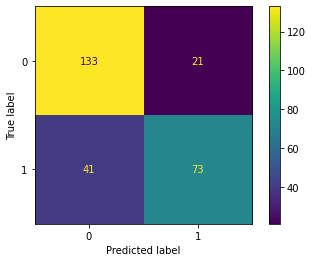

In [349]:
plot_confusion_matrix(model_SVC , X_test , test_y )
plt.show()

## 🟣Acuracy

In [350]:
acc_SVC = accuracy_score(test_y, pred_y_SVC)
acc_SVC

0.7686567164179104

## 🟣 Precision Score

In [351]:
p_score_SVC = precision_score(test_y, pred_y_SVC)
p_score_SVC

0.776595744680851

## 🟣 Recall score

In [352]:
r_score_SVC = recall_score(test_y, pred_y_SVC)
r_score_SVC

0.6403508771929824

## 🟣 F1-score

In [353]:
f_score_SVC = f1_score(test_y, pred_y_SVC)
f_score_SVC

0.7019230769230769

# Step21: Final Model
<hr>
<h1> Hyperparameters
<h4> Choosing the best hyperparameters through GridSearchCV

In [354]:
svm_model = svm.SVC()
param_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000] , 'gamma':[1, 0.1 , 0.01, 0.001, 0.0001] , 'kernel':['linear', 'poly', 'rbf']}

## 🟣 Fit model with the best hyperparameters

In [355]:
grid = GridSearchCV(svm_model, param_grid=param_grid, cv=5)
grid.fit(X_train, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [356]:
grid.best_estimator_.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [360]:

final_model_svc = svm.SVC(C=10, kernel= 'rbf' , break_ties=False, cache_size=200, class_weight=None, coef0=0 ,decision_function_shape='ovr', 
                          degree=3, gamma=0.01, max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

final_model_svc.fit(X_train, train_y)

SVC(C=10, coef0=0, gamma=0.01)

## 🟣 Predict

In [361]:
pred_y_SVC = final_model_svc.predict(X_test)


## 🟣 Evaluating the Model

### 🟣 Confusion Matrix

In [362]:
cm = confusion_matrix(test_y, pred_y_SVC)
cm

array([[137,  17],
       [ 34,  80]])

### Classification Report

In [363]:
target_names = ['Gone', 'Survived']
cr = classification_report(test_y, pred_y_SVC, target_names = target_names )
print(cr)

              precision    recall  f1-score   support

        Gone       0.80      0.89      0.84       154
    Survived       0.82      0.70      0.76       114

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


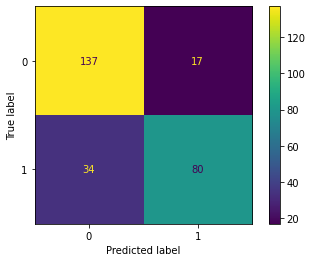

In [365]:
plot_confusion_matrix(final_model_svc , X_test , test_y )
plt.show()

### 🟣Acuracy

In [366]:
acc_SVC = accuracy_score(test_y, pred_y_SVC)
acc_SVC

0.8097014925373134

### 🟣 Precision Score

In [367]:
p_score_SVC = precision_score(test_y, pred_y_SVC)
p_score_SVC

0.8247422680412371

### 🟣 Recall score

In [368]:
r_score_SVC = recall_score(test_y, pred_y_SVC)
r_score_SVC

0.7017543859649122

### 🟣 F1-score

In [369]:
f_score_SVC = f1_score(test_y, pred_y_SVC)
f_score_SVC

0.7582938388625592

# Step22: Create DataFrame From Accuracy & Precision & Recall & F1-score(Final Model)

In [370]:
eval_SVC = pd.DataFrame([acc_SVC*100, p_score_SVC*100, r_score_SVC*100, f_score_SVC*100],['Accuracy' , 'Precision' , 'Recall' , 'F1-score'],['precent'])

# Step23: Create DataFrame From Accuracy & Precision & Recall & F1-score
<hr>
<h3>Concanate All Models dataframes (Step10, Step17, Step22)

In [395]:
eval_df = eval_LR
eval_df.rename(columns = {'precent':'Logestic Regression'}, inplace = True)

eval_df['KNN'] = eval_KNN['precent']

eval_df['SVC'] = eval_SVC['precent']

In [396]:
eval_df

,Logestic Regression,KNN,SVC
Accuracy,78.358209,82.089552,80.970149
Precision,77.450980,86.666667,82.474227
Recall,69.298246,68.421053,70.175439
F1-score,73.148148,76.470588,75.829384


## Best Wishes!, Filoger
<br>
<br>
<br>